# Python Statistics Practice - 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Probability - Simulating Coin Filps

### Basic

In [7]:
# outcome of one coin flip - method 1
np.random.randint(2)

1

In [8]:
# outcome of one coin flip - method 2
np.random.choice([0, 1])

0

In [4]:
# outcomes of ten thousand coin flips - method 1
np.random.randint(2, size=10000)

array([1, 1, 0, ..., 1, 0, 1])

In [9]:
# outcome of ten thousand coin flips - method 2
np.random.choice([0, 1], size=10000)

array([0, 1, 0, ..., 1, 1, 0])

In [5]:
# mean outcome of ten thousand coin flips - should be around 0.5 - method 1
np.random.randint(2, size=10000).mean()

0.5068

In [10]:
# mean outcome of ten thousand coin flips - should be around 0.5 - method 2
np.random.choice([0, 1], size=10000).mean()

0.5003

In [11]:
# outcomes of ten thousand biased coin flips
np.random.choice([0, 1], size=10000, p=[0.8, 0.2])

array([0, 0, 0, ..., 0, 1, 0])

In [12]:
# mean outcome of ten thousand biased coin flips
np.random.choice([0, 1], size=10000, p=[0.8, 0.2]).mean()

0.1985

### Example - Coin Flips and Die Rolls

### 1. Two fair coin flips produce exactly two heads

In [15]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(int(1e6), 2))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly two heads
(test_sums == 0).mean()

0.249721

### 2. Three fair coin flips produce exactly one head

In [25]:
# simulate 1 million tests of three fair coin flips
tests = np.random.randint(2, size=(int(1e6), 3))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

0.37531

### 3. Three biased coin flips with P(H) = 0.6 produce exactly one head

In [26]:
# simulate 1 million tests of three bias coin flips
tests = np.random.choice([0, 1], size=(int(1e6), 3), p=[0.6, 0.4])

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()


0.288035

### 4. A die rolls an even number

In [28]:
# simulate 1 million tests of one die roll
tests = np.random.choice(np.arange(1, 7), size=int(1e6))

# proportion of tests that produced an even number
(tests % 2 == 0).mean()

0.499956

### 5. Two dice roll a double

In [29]:
# simulate the first million die rolls
first = np.random.choice(np.arange(1, 7), size=int(1e6))

# simulate the second million die rolls
second = np.random.choice(np.arange(1, 7), size=int(1e6))

# proportion of tests where the 1st and 2nd die rolled the same number
(first == second).mean()

0.166434

## Probability - Simulating Many Coin Flips

### Basic

In [30]:
# number of heads from 10 fair coin flips
np.random.binomial(10, 0.5)

5

In [31]:
# results from 20 tests with 10 coin flips
np.random.binomial(10, 0.5, 20)

array([4, 6, 2, 5, 5, 4, 5, 3, 5, 4, 7, 8, 6, 5, 6, 8, 5, 5, 4, 6])

In [32]:
# mean number of heads from the 20 tests
np.random.binomial(10, 0.5, 20).mean()

4.5

In [33]:
# reflects the fairness of the coin more closely as # tests increases
np.random.binomial(10, 0.5, 1000000).mean()

5.000014

(array([   961.,   9760.,  44272., 117086., 205149., 246358., 205077.,
        116899.,  43621.,  10817.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

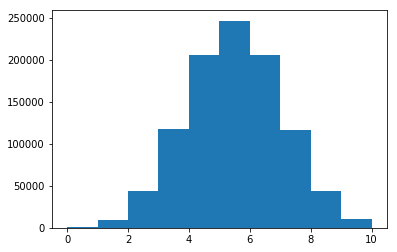

In [34]:
# histogram
plt.hist(np.random.binomial(10, 0.5, 1000000))

(array([3.90000e+01, 1.68900e+03, 2.64280e+04, 1.07158e+05, 3.24861e+05,
        3.55787e+05, 1.39685e+05, 4.10840e+04, 3.17600e+03, 9.30000e+01]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <a list of 10 Patch objects>)

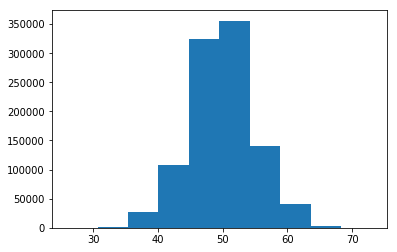

In [35]:
# gets more narrow as number of flips increase per test
plt.hist(np.random.binomial(100, 0.5, 1000000))

### Example - Binomial Distributions

### 1. A fair coin flip produces heads

In [37]:
# simulate 1 million tests of one fair coin flip
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

0.500274

### 2. Five fair coin flips produce exactly one head

In [39]:
# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5, 0.5, int(1e6))

# proportion of tests that produced 1 head
(tests == 1).mean()

0.156289

### 3. Ten fair coin flips produce exactly four heads

In [40]:
# simulate 1 million tests of ten fair coin flips
tests = np.random.binomial(10, 0.5, int(1e6))

# proportion of tests that produced 4 heads
(tests == 4).mean()

0.205274

### 4. Five biased coin flips with P(H) = 0.8 produce exactly five heads

In [41]:
# simulate 1 million tests of five biased coin flips
tests = np.random.binomial(5, 0.8, int(1e6))

# proportion of tests that produced 5 heads
(tests == 5).mean()

0.327671

### 5. Ten biased coin flips with P(H) = 0.15 produce 3 heads

In [43]:
# simulate 1 million tests of ten biased coin flips
tests = np.random.binomial(10, 0.15, int(1e6))

# proportion of tests that produced at least 3 heads
1 - (tests == 0).mean() - (tests == 1).mean() - (tests == 2).mean()


0.17984900000000004

## Cancer Test Results Example

### Basic

In [ ]:
df = pd.read_csv("cancer_test_data.csv")

In [ ]:
# number of patients
# df.shape
total = df['patient_id'].count()

# number of patients with cancer
with_cancer = df.has_cancer.sum()

# number of patients without cancer
without_cancer = (df.has_cancer == False).sum()

In [ ]:
# proportion of patients with cancer
# df.has_cancer.mean()
with_cancer / total

# proportion of patients without cancer
without_cancer / total

In [ ]:
# proportion of patients with cancer who test positive
# (df.query('has_cancer')['test_result'] == 'Positive').mean()

with_c_positive = ((df.has_cancer == True) & (df.test_result == "Positive")).sum()

In [ ]:
with_c_positive / total

In [ ]:
# proportion of patients with cancer who test negative
# (df.query('has_cancer')['test_result'] == 'Negative').mean()

with_c_negative = ((df.has_cancer == True) & (df.test_result == "Negative")).sum()

In [ ]:
with_c_negative / total

In [ ]:
# proportion of patients without cancer who test positive
# (df.query('has_cancer == False')['test_result'] == 'Positive').mean()

without_c_positive = ((df.has_cancer == False) & (df.test_result == "Positive")).sum()

In [ ]:
without_c_positive / total

In [ ]:
# proportion of patients without cancer who test negative
# (df.query('has_cancer == False')['test_result'] == 'Negative').mean()

without_c_negative = ((df.has_cancer == False) & (df.test_result == "Negative")).sum()

In [ ]:
without_c_negative/total

### Conditional Probability & Bayes Rule 

In [ ]:
# What proportion of patients who tested positive has cancer?
df.query('test_result == \"Positive\"')['has_cancer'].mean()

In [ ]:
# What proportion of patients who tested positive doesn't have cancer?

1 - df.query('test_result == \"Positive\"')['has_cancer'].mean()

In [ ]:
# What proportion of patients who tested negative has cancer?
df.query('test_result == \"Negative\"')['has_cancer'].mean()

In [ ]:
# What proportion of patients who tested negative doesn't have cancer?

1 - df.query('test_result == \"Negative\"')['has_cancer'].mean()